✅ Successfully loaded 1500 data points from xy_data.csv.

🚀 Starting global optimization (pure L1, no KDTree)...
This may take a few minutes.
differential_evolution step 1: f(x)= 1.8339339314004002
differential_evolution step 2: f(x)= 1.8339339314004002
differential_evolution step 3: f(x)= 1.530945304809095
differential_evolution step 4: f(x)= 1.2168033285780464
differential_evolution step 5: f(x)= 1.059516474947607
differential_evolution step 6: f(x)= 1.059516474947607
differential_evolution step 7: f(x)= 1.059516474947607
differential_evolution step 8: f(x)= 0.8557994321269715
differential_evolution step 9: f(x)= 0.8557994321269715
differential_evolution step 10: f(x)= 0.7815342177931851
differential_evolution step 11: f(x)= 0.5739635258222037
differential_evolution step 12: f(x)= 0.5739635258222037
differential_evolution step 13: f(x)= 0.5306223581498513
differential_evolution step 14: f(x)= 0.5053617064499196
differential_evolution step 15: f(x)= 0.3301323487134745
differential_evo

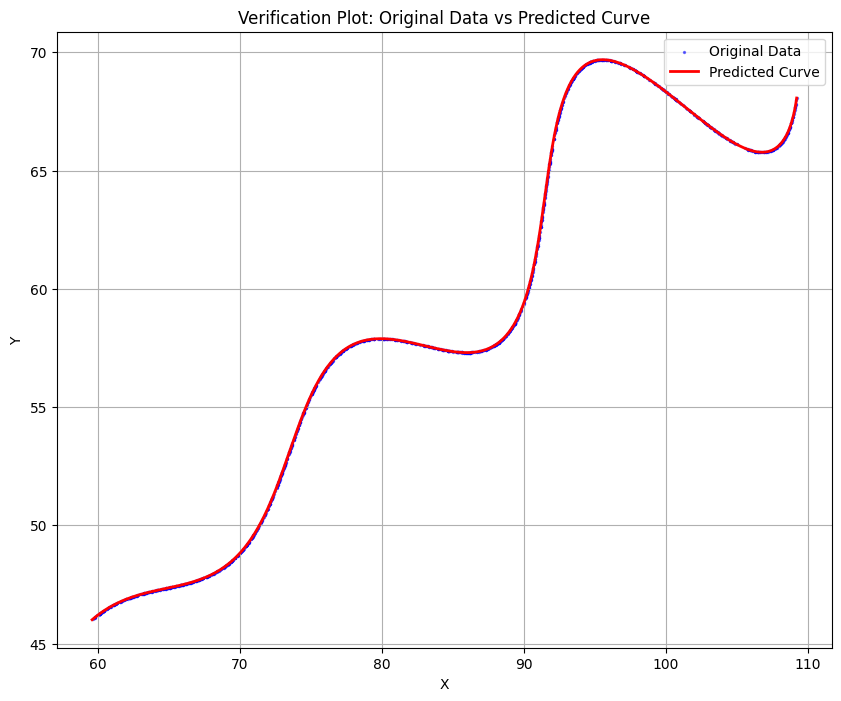

In [ ]:
# -*- coding: utf-8 -*-
"""Optimisation Assignment """

import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import sys
import matplotlib.pyplot as plt

# --- 1. Load Data ---
file_name = 'xy_data.csv'

try:
    data = pd.read_csv(file_name)
    actual_x = data['x'].values
    actual_y = data['y'].values
    P_actual = np.stack([actual_x, actual_y], axis=1)
    print(f" Successfully loaded {len(actual_x)} data points from {file_name}.")
except FileNotFoundError:
    print(f" ERROR: File '{file_name}' not found.")
    sys.exit()


num_points = len(actual_x)
t_values = np.linspace(6, 60, num_points)

def cost_function(params):
    theta_rad, M, X = params

    term_exp = np.exp(M * np.abs(t_values))
    term_sin_t = np.sin(0.3 * t_values)

    pred_x = t_values * np.cos(theta_rad) - term_exp * term_sin_t * np.sin(theta_rad) + X
    pred_y = 42 + t_values * np.sin(theta_rad) + term_exp * term_sin_t * np.cos(theta_rad)
    P_pred = np.stack([pred_x, pred_y], axis=1)

    
    total_l1 = 0
    for p in P_pred:
        # Compute L1 distance to all actual points, find the closest one
        l1_distances = np.sum(np.abs(P_actual - p), axis=1)
        total_l1 += np.min(l1_distances)

    mean_l1_error = total_l1 / len(P_pred)
    return mean_l1_error

print("\n Starting global optimisation...")

theta_min_rad = 0 * np.pi / 180
theta_max_rad = 50 * np.pi / 180

param_bounds = [
    (theta_min_rad + 1e-6, theta_max_rad),
    (-0.05, 0.05),
    (0, 100)
]

result = differential_evolution(
    cost_function,
    bounds=param_bounds,
    disp=True,
    popsize=10,   
    tol=1e-4
)


if result.success:
    print("\n Optimisation Successful!")

    found_theta_rad, found_M, found_X = result.x
    found_theta_deg = found_theta_rad * 180 / np.pi

    print(f"\nFound Unknowns:")
    print(f"  θ (degrees): {found_theta_deg:.6f}")
    print(f"  θ (radians): {found_theta_rad:.6f}")
    print(f"  M:           {found_M:.6f}")
    print(f"  X:           {found_X:.6f}")
    print(f"\nFinal Error (Mean L1 Distance): {result.fun:.8f}")

   
    print("Latex format:")
    print(f"\\left(t*\\cos({found_theta_rad:.6f})-e^{{{found_M:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({found_theta_rad:.6f})\\ +{found_X:.6f},42+\\ t*\\sin({found_theta_rad:.6f})+e^{{{found_M:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({found_theta_rad:.6f})\\right)")
else:
    print("\n Optimisation failed")
    print(result.message)

# visualisations 
try:
    found_theta_rad, found_M, found_X = result.x
    smooth_t = np.linspace(6, 60, 2000)

    term_exp = np.exp(found_M * np.abs(smooth_t))
    term_sin_t = np.sin(0.3 * smooth_t)

    pred_x = smooth_t * np.cos(found_theta_rad) - term_exp * term_sin_t * np.sin(found_theta_rad) + found_X
    pred_y = 42 + smooth_t * np.sin(found_theta_rad) + term_exp * term_sin_t * np.cos(found_theta_rad)

    plt.figure(figsize=(10, 8))
    plt.scatter(P_actual[:, 0], P_actual[:, 1], label='Original Data', color='blue', s=2, alpha=0.5)
    plt.plot(pred_x, pred_y, label='Predicted Curve', color='red', linewidth=2.0)
    plt.title('Verification Plot: Original Data vs Predicted Curve')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"\n Visualisation skipped: {e}")
